In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
from urllib.request import urlopen

data = [
    ["2022-2023", "OTT,NYR", 62, 8, 0.13, 11, 0.18, 19, 0.31, 6, 0.10, 109, 1.76, 0, 0.00, 118, 1.90, 60, 0.97, 21, 0.34],
    ["2021-2022", "VAN,NYR", 58, 7, 0.12, 8, 0.14, 15, 0.26, 22, 0.38, 101, 1.74, 0, 0.00, 117, 2.02, 58, 1.00, 11, 0.19],
    ["2020-2021", "VAN", 24, 6, 0.25, 3, 0.13, 9, 0.38, 14, 0.58, 40, 1.67, 0, 0.00, 100, 4.17, 28, 1.17, 12, 0.50],
    ["2019-2020", "VAN", 34, 4, 0.12, 4, 0.12, 8, 0.24, 10, 0.29, 38, 1.12, 0, 0.00, 118, 3.47, 37, 1.09, 8, 0.24],
    ["2018-2019", "VAN", 74, 9, 0.12, 7, 0.09, 16, 0.22, 10, 0.14, 114, 1.54, 0, 0.00, 200, 2.70, 52, 0.70, 15, 0.20],
    ["2017-2018", "CBJ,VAN", 46, 5, 0.11, 2, 0.04, 7, 0.15, 6, 0.13, 64, 1.39, 0, 0.00, 93, 2.02, 27, 0.59, 6, 0.13],
    ["2016-2017", "CHI", 33, 4, 0.12, 3, 0.09, 7, 0.21, 14, 0.42, 46, 1.39, 0, 0.00, 27, 0.82, 24, 0.73, 4, 0.12]
]

columns = [
    "Season", "Team", "GP", "G", "G/GP", "A", "A/GP", "PTS", "PTS/G", "PIM", "PIM/GP",
    "SOG", "SOG/GP", "PPP", "PPP/GP", "HITS", "HITS/GP", "BKS", "BKS/GP", "FOW", "FOW/GP"
]

motte = pd.DataFrame(data, columns=columns).sort_values('Season',)
data2 = [
    ["2022-2023", "PIT", 62, 6, 0.10, 6, 0.10, 12, 0.19, 43, 0.69, 71, 1.15, 0, 0.00, 195, 3.15, 28, 0.45, 1, 0.02],
    ["2021-2022", "EDM", 8, 0, 0.00, 1, 0.13, 1, 0.13, 7, 0.88, 4, 0.50, 0, 0.00, 27, 3.38, 2, 0.25, 2, 0.25],
    ["2020-2021", "EDM", 52, 7, 0.13, 6, 0.12, 13, 0.25, 37, 0.71, 62, 1.19, 0, 0.00, 192, 3.69, 35, 0.67, 4, 0.08],
    ["2019-2020", "EDM", 62, 12, 0.19, 9, 0.15, 21, 0.34, 12, 0.19, 64, 1.03, 0, 0.00, 165, 2.66, 44, 0.71, 0, 0.00],
    ["2018-2019", "ARI", 68, 12, 0.18, 10, 0.15, 22, 0.32, 15, 0.22, 92, 1.35, 0, 0.00, 161, 2.37, 39, 0.57, 12, 0.18],
    ["2017-2018", "ARI,PIT", 42, 5, 0.12, 6, 0.14, 11, 0.26, 25, 0.60, 42, 1.00, 0, 0.00, 86, 2.05, 16, 0.38, 25, 0.60],
    ["2016-2017", "PIT", 10, 3, 0.30, 0, 0.00, 3, 0.30, 4, 0.40, 11, 1.10, 0, 0.00, 28, 2.80, 2, 0.20, 0, 0.00],
    ["2015-2016", "PIT", 1, 0, 0.00, 0, 0.00, 0, 0.00, 0, 0.00, 0, 0.00, 0, 0.00, 1, 1.00, 1, 1.00, 0, 0.00],
]

columns2 = [
    "Season", "Team", "GP", "G", "G/GP", "A", "A/GP", "PTS", "PTS/G", "PIM", "PIM/GP",
    "SOG", "SOG/GP", "PPP", "PPP/GP", "HITS", "HITS/GP", "BKS", "BKS/GP", "FOW", "FOW/GP"
]

archibald = pd.DataFrame(data2, columns=columns2)
motte.sort_values('Season', inplace=True)
archibald.sort_values('Season', inplace=True)

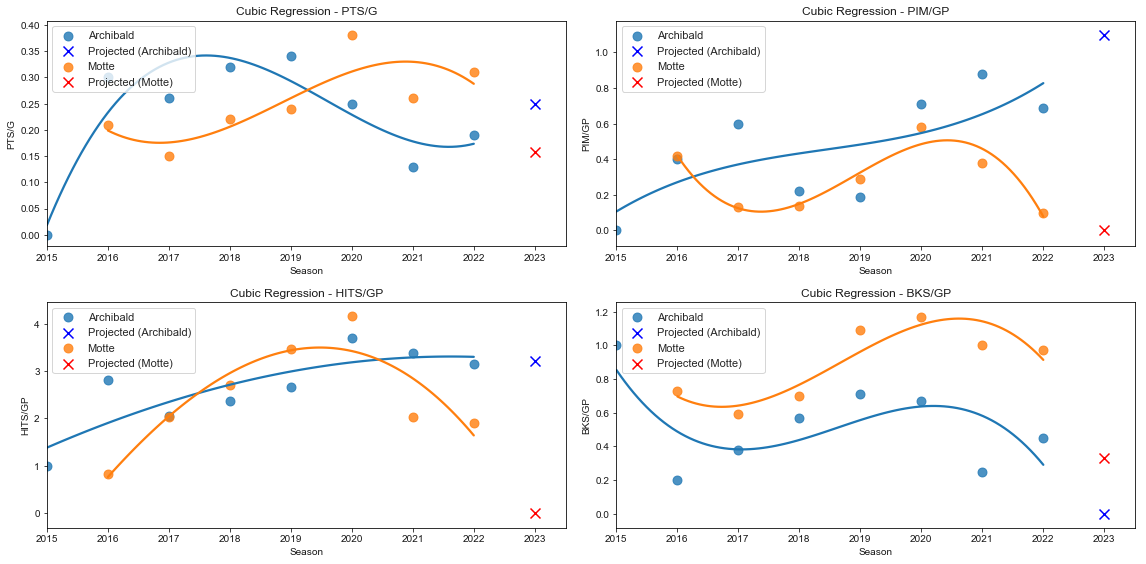

In [2]:
combined_df = pd.concat([archibald, motte], keys=['Archibald', 'Motte'])
statistics_to_compare = ["PTS/G", "PIM/GP", "HITS/GP", "BKS/GP"]
projection_colors = {'Archibald': 'blue', 'Motte': 'red'}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
sns.set(style="whitegrid")

for i, statistic in enumerate(statistics_to_compare):
    row, col = i // 2, i % 2
    ax = axes[row, col]
    
    for player in ['Archibald', 'Motte']:
        player_data = combined_df.loc[player].reset_index()
        player_data['Season'] = player_data['Season'].str.extract('(\d+)').astype(float)
        
        sns.regplot(
            data=player_data,
            x="Season",
            y=statistic,
            ax=ax,
            ci=None,
            order=3,
            scatter_kws={'s': 80},
            label=player,
        )
    
        x_values = player_data['Season']
        y_values = player_data[statistic]
        coeffs = np.polyfit(x_values, y_values, 3)
        
        next_season = x_values.max() + 1
        projected_value = coeffs[0] * next_season**3 + coeffs[1] * next_season**2 + coeffs[2] * next_season + coeffs[3]
        
        projected_value = max(projected_value, 0)
        
        ax.scatter(next_season, projected_value, color=projection_colors[player], marker='x', s=100, label=f'Projected ({player})')
    
    ax.set_xlabel("Season")
    ax.set_ylabel(statistic)
    ax.set_title(f"Cubic Regression - {statistic}")
    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

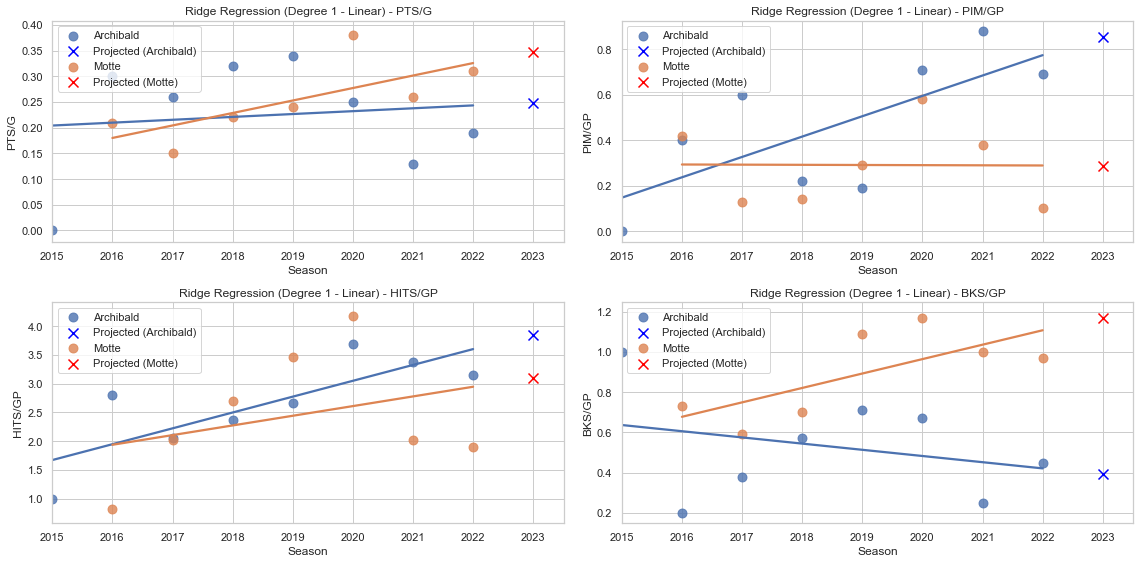

In [3]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

combined_df = pd.concat([archibald, motte], keys=['Archibald', 'Motte'])
statistics_to_compare = ["PTS/G", "PIM/GP", "HITS/GP", "BKS/GP"]
projection_colors = {'Archibald': 'blue', 'Motte': 'red'}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
sns.set(style="whitegrid")

for i, statistic in enumerate(statistics_to_compare):
    row, col = i // 2, i % 2
    ax = axes[row, col]
    
    for player in ['Archibald', 'Motte']:
        player_data = combined_df.loc[player].reset_index()
        player_data['Season'] = player_data['Season'].str.extract('(\d+)').astype(float)
        
        model = make_pipeline(PolynomialFeatures(degree=1), Ridge(alpha=1.0))
        
        model.fit(player_data[['Season']], player_data[statistic])
        
        next_season = player_data['Season'].max() + 1
        projected_value = model.predict(np.array([[next_season]]))[0]
        
        projected_value = max(projected_value, 0)
        
        sns.regplot(
            data=player_data,
            x="Season",
            y=statistic,
            ax=ax,
            ci=None,
            order=1,
            scatter_kws={'s': 80},
            label=player,
        )
    
        ax.scatter(next_season, projected_value, color=projection_colors[player], marker='x', s=100, label=f'Projected ({player})')
    
    ax.set_xlabel("Season")
    ax.set_ylabel(statistic)
    ax.set_title(f"Ridge Regression (Degree 1 - Linear) - {statistic}")
    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Analysis
In comparing Tyler Motte and Josh Archibald across the above statistics - Points per Game, Penalties in Minutes per Game, Hits per Game and Blocks per Game - it can be determined that there is strong evidence to suggest that Motte is a strong replacement for Archibald at the 4th line Right Wing position. Via linear ridge regression, with consideration of the cubic regression, the data suggests that Motte will surpass/outpus a similar points production to that of Archibald, while also significantly outperforming Archibald in Penalty Avoidance & Blocks; however, Archibald was projected to surpass Motte in Hits per 60 for the upcoming season to varying degrees.

# Conclusions
In concluding, based on the above analysis, I believe Motte is an improvement over Archibald, as shown in the projections for Blocks, Pts & PIM's per 60. Additionally, I believe the physical presence of Luke Glendening at the 4th line Center position will provide a strong physical element on the 4th line. I also personally believe Motte will overachieve the projected Hits/60 in the cubic projection and lean closer to that of the linear ridge regression projection. These projections could benefit from utilizing training data with similar 4th line-type players in the league.

In [33]:
url1 = 'https://www.capfriendly.com/browse/active/2024/caphit/all/forwards?signing-status=ufa&stats-season=2023&limits=age-22-46,caphit-0-1000000,gp-1-90'
url2 = 'https://www.capfriendly.com/browse/active/2024/caphit/all/forwards?signing-status=ufa&stats-season=2023&limits=age-22-46,caphit-0-1000000,gp-1-90&pg=2'
url3 = 'https://www.capfriendly.com/browse/active/2024/caphit/all/forwards?signing-status=ufa&stats-season=2023&limits=age-22-46,caphit-0-1000000,gp-1-90&pg=3'
html1 = urlopen(url1)
soup1 = BeautifulSoup(html1, 'html.parser')
table1 = soup1.find('table')
html2 = urlopen(url2)
soup2 = BeautifulSoup(html2, 'html.parser')
table2 = soup2.find('table')
html3 = urlopen(url3)
soup3 = BeautifulSoup(html3, 'html.parser')
table3 = soup3.find('table')

# Create empty lists to store the table data and headers
data = []
headers = []

def extract_headers(table):
    # Extract the table headers (th elements) and append them to the 'headers' list
    for th in table.findAll('th'):
        headers.append(th.text.strip())
def extract_table(table):
    # Extract the table rows (tr elements) and their data (td elements)
    for row in table.findAll('tr'):
        row_data = []
        for cell in row.findAll('td'):
            row_data.append(cell.text.strip())
        # Only add rows with data (skip header rows)
        if row_data:
            data.append(row_data)

extract_headers(table1)
extract_table(table1)
extract_table(table2)
extract_table(table3)
        
soupdf = pd.DataFrame(data, columns=headers)

In [34]:
soupdf['PLAYER'] = soupdf['PLAYER'].str.replace(r'[0-9.]+', '')
soupdf['PLAYER'] = soupdf['PLAYER'].str.strip()
soupdf.rename(columns={'PLAYER': 'name'}, inplace=True)

In [35]:
skaters_2022 = pd.read_csv('skaters_2022.csv')
skaters_2022 = skaters_2022.merge(soupdf, on='name', how='inner')
skaters_2022.drop(columns={'W', 'L', 'SO', 'GAA', 'Sv%'}, inplace = True)
skaters_2022_all = skaters_2022[skaters_2022['situation']=='all']
skaters_2022_all.sort_values('icetime', inplace=True, ascending=False)
skaters_2022_all.reset_index(inplace=True, drop=True)

<ipython-input-35-f5db3bdfcd55>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skaters_2022_all.sort_values('icetime', inplace=True, ascending=False)


In [36]:
skaters_2022_all.drop(columns={'position', 'EXPIRY', 'SALARY', 'season'}, inplace=True)
skaters_2022_all['I_F_hits'] = pd.to_numeric(skaters_2022_all['I_F_hits'], errors='coerce')
skaters_2022_all['P/GP'] = pd.to_numeric(skaters_2022_all['P/GP'], errors='coerce')
skaters_2022_all['GP'] = pd.to_numeric(skaters_2022_all['GP'], errors='coerce')
skaters_2022_all['shotsBlockedByPlayer'] = pd.to_numeric(skaters_2022_all['shotsBlockedByPlayer'], errors='coerce')
skaters_2022_all['icetime'] = pd.to_numeric(skaters_2022_all['icetime'], errors='coerce')
skaters_2022_all.rename(columns = {'I_F_penalityMinutes':'I_F_penaltyMinutes'}, inplace = True)
skaters_2022_all['I_F_penaltyMinutes'] = pd.to_numeric(skaters_2022_all['I_F_penaltyMinutes'], errors='coerce')

C:\Users\jesse\miniconda3\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-36-1127bfa88e61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skaters_2022_all['I_F_hits'] = pd.to_numeric(skaters_2022_all['I_F_hits'], errors='coerce')
<ipython-input-36-1127bfa88e61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [42]:
#Value Over Replacement Player - for 4th Line Right Wing Replacement Players
skaters_2022_all['VORP'] = (skaters_2022_all['I_F_hits'] / skaters_2022_all['GP'] * 0.2 + skaters_2022_all['P/GP'] * 0.3 + skaters_2022_all['shotsBlockedByPlayer'] / skaters_2022_all['GP'] * 0.5 - skaters_2022_all['I_F_penaltyMinutes'] / skaters_2022_all['GP'] * 0.15)
skaters_2022_all['VORP'] = round(skaters_2022_all['VORP'] - skaters_2022_all['VORP'].mean(), 5)
skaters_2022_all = skaters_2022_all.sort_values('VORP', ascending=False)
skaters_2022_all.reset_index(drop=True, inplace=True)
skaters_2022_all_VORP = skaters_2022_all.loc[:, ['name', 'I_F_hits', 'P/GP', 'shotsBlockedByPlayer', 'I_F_penaltyMinutes', 'CAP HIT', 'VORP']]

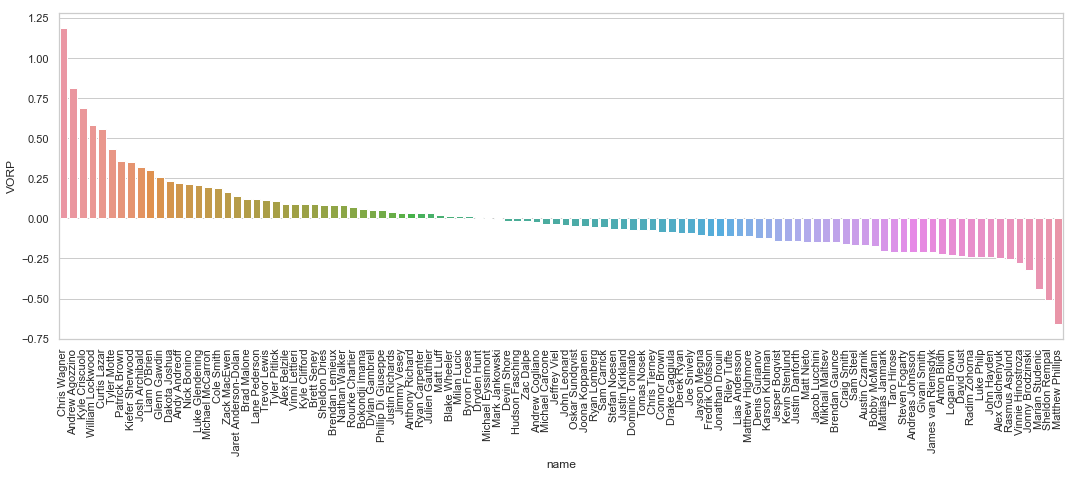

In [43]:
plt.figure(figsize=(18, 6))
sns.barplot(data = skaters_2022_all_VORP, x = 'name', y = 'VORP')
plt.xticks(rotation=90)
plt.show()

In [44]:
#Create csv with players data
    #This data shows the Value Over Replacement based on statistics that make a strong 4th line player
file_path = 'VORP.csv'
skaters_2022_all_VORP.to_csv(file_path, index=False)

# Analysis
In comparing forwards based on the 2022 statistics - Points per Game, Hits per Game, Blocks per Game & Penalties per Game - via VORP (Value Over Replacement Player) for all players older than 21 with a Cap Hit of less than 1,000,000, UFA signing status and at least 1 game played, it was determined that Tyler Motte is a very strong 4th Line Player. Tyler Motte ranked 6th in VORP at 0.4335 from the 104 players in the dataset; Josh Archibald ranked 9th at 0.3225.

# Conclusion
In concluding, based on the above analysis, I would once again suggest Tyler Motte as a strong replacement/upgrade over Archibald at the 4th Line Right Wing position.